In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import rubin_sim.maf as maf
from rubin_sim.maf import radar

In [2]:
def norm_df(
    df,
    runs,
    cols,
    norm_run="baseline",
    invert_cols=None,
    reverse_cols=None,
    run_label="run_name",
    mag_cols=[],
):
    """
    Normalize values in a dataframe to a given run
    Parameters
    ----------
    df : pandas.DataFrame
        The input data frame
    runs : list of str
        A list of run numes
    cols : list of str
        A list of columns in df to use
    norm_run : str
        The row to use to normalize things to
    invert_cols : list of str
        A list of column names that should be inverted (e.g., columns that
        are uncertainties and are better with a smaller value)
    reverse_cols : list of str
        Columns to reverse (e.g., magnitudes)
    run_label : str (run_name)
        The column that has run names
    mag_cols : list of str
        Columns that are in magnitudes
    """
    indices = [np.max(np.where(df.index == name)[0]) for name in runs]
    out_df = df[cols].iloc[indices].copy()
    if reverse_cols is not None:
        for colname in reverse_cols:
            out_df[colname] = -out_df[colname]
    if invert_cols is not None:
        for colname in invert_cols:
            out_df[colname] = 1.0 / out_df[colname]
    if norm_run is not None:
        indx = np.max(np.where(out_df.index == norm_run)[0])
        for col in out_df.columns:
            # maybe just check that it's not a
            if col != "run_name":
                if (col in mag_cols) | (mag_cols == "all"):
                    out_df[col] = 1.0 + (out_df[col] - out_df[col].iloc[indx])
                else:
                    out_df[col] = (
                        1.0
                        + (out_df[col] - out_df[col].iloc[indx])
                        / out_df[col].iloc[indx]
                    )
    return out_df

In [3]:
data_loaded = pd.read_hdf('summary.h5')
#data_loaded = pd.read_csv('summary.csv')


In [4]:
[col for col in data_loaded.columns if 'Number of Exposures' in col]

['Identity Number of Exposures UniSlicer',
 'Identity Number of Exposures g UniSlicer',
 'Identity Number of Exposures i UniSlicer',
 'Identity Number of Exposures r UniSlicer',
 'Identity Number of Exposures u UniSlicer',
 'Identity Number of Exposures y UniSlicer',
 'Identity Number of Exposures z UniSlicer']

In [10]:
data_loaded['Identity Number of Exposures UniSlicer']

clouds                               NaN
weather_cloudso0v3.1_10yrs     2092993.0
weather_cloudso10v3.1_10yrs    2206889.0
weather_cloudso11v3.1_10yrs    2207240.0
weather_cloudso1v3.1_10yrs     2133321.0
weather_cloudso20v3.1_10yrs    2204158.0
weather_cloudso21v3.1_10yrs    2188531.0
weather_cloudso30v3.1_10yrs    2146963.0
weather_cloudso31v3.1_10yrs    2153195.0
weather_cloudso35v3.1_10yrs    2181380.0
weather_cloudso36v3.1_10yrs    2166553.0
Name: Identity Number of Exposures UniSlicer, dtype: float64

In [9]:
np.nanmedian(data_loaded['Identity Number of Exposures UniSlicer'])

2173966.5

In [14]:
name_dict = {'best18k parallax HealpixSlicer': 'parallax best 18k',
            'best18k properMotion HealpixSlicer': 'proper motion best 18k',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 20_30 days UserPointsSlicer': '20-30d microlensing\ndetection',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 60_90 days UserPointsSlicer': '60-90d microlensing\ndetection',
            'fONv MedianNvis fO HealpixSlicer': 'fO N vis',
            'Total detected SNNSNMetric_reducen_sn DDF excluded HealpixSlicer': 'SNe, N',
             'Median SNNSNMetric_reducezlim DDF excluded HealpixSlicer': 'SNe, zlim',
            '3x2ptFoM Exgalm5WithCuts i band non-DD year 10 HealpixSlicer': '3x2 i-band',
            'Median WeakLensingNvisits gri band non-DD HealpixSlicer': 'WL Nvis i-band',
            'Total detected KNePopMetric_all_ztfrest_simple all models UserPointsSlicer': 'KNe ZTF simple',
            'Total detected XRBPopMetric_early_detect UserPointsSlicer': 'XRB\nearly detect',
            'VolumeSum Brown Dwarf, L7 HealpixSlicer': 'Brown Dwarf Vol',
            'CumulativeCompleteness H <= 16.000000 DiscoveryNChances NEO 3 pairs in 15 nights SNR=3 detection loss MoObjSlicer': 'NEO bright',
            'CumulativeCompleteness H <= 22.000000 DiscoveryNChances NEO 3 pairs in 15 nights SNR=3 detection loss MoObjSlicer': 'NEO faint',
            'CumulativeCompleteness H <= 6.000000 DiscoveryNChances TNO 3 pairs in 15 nights SNR=3 detection loss MoObjSlicer': 'TNO',
            'CumulativeCompleteness H <= 16.000000 DiscoveryNChances Vatira 1 quad in 1 night detection loss MoObjSlicer': 'Vatira'}
invert_cols = ['parallax best 18k', 'proper motion best 18k']
# Columns that are already percents or magnitudes, so display difference rather than percent difference
mag_cols = ['20-30d microlensing\ndetection', '60-90d microlensing\ndetection', 'NEO bright', 'NEO faint', 'TNO', 'Vatira']

data = pd.DataFrame()
for key in name_dict:
    data[name_dict[key]] = data_loaded[key]
    

mag_dict = {'Median CoaddM5 g HealpixSlicer': 'g',
 'Median CoaddM5 i HealpixSlicer': 'i',
 'Median CoaddM5 r HealpixSlicer': 'r',
 'Median CoaddM5 u HealpixSlicer': 'u',
 'Median CoaddM5 y HealpixSlicer': 'y',
 'Median CoaddM5 z HealpixSlicer': 'z'}

mag_data = pd.DataFrame()
for key in mag_dict:
    mag_data[mag_dict[key]] = data_loaded[key]
    
    
    
ddf_dict = {'Sum SNNSNMetric DD:COSMOS_reducen_sn DD:COSMOS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN COSMOS',
           'Sum SNNSNMetric DD:ECDFS_reducen_sn DD:ECDFS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN ECDFS',
           'Sum SNNSNMetric DD:EDFS_reducen_sn DD:EDFS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN EDFS',
           'Sum SNNSNMetric DD:ELAISS1_reducen_sn DD:ELAISS1 all bands, only DDF observations HealpixSubsetSlicer' : 'N SN ELAISS1',
           'Sum SNNSNMetric DD:XMM_LSS_reducen_sn DD:XMM_LSS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN XMM_LSS',
            
           'Median SNNSNMetric DD:COSMOS_reducezlim DD:COSMOS all bands, only DDF observations HealpixSubsetSlicer': 'zlim COSMOS',
            'Median SNNSNMetric DD:ECDFS_reducezlim DD:ECDFS all bands, only DDF observations HealpixSubsetSlicer': 'zlim ECDFS',
            'Median SNNSNMetric DD:EDFS_reducezlim DD:EDFS all bands, only DDF observations HealpixSubsetSlicer': 'zlim EDFS',
            'Median SNNSNMetric DD:ELAISS1_reducezlim DD:ELAISS1 all bands, only DDF observations HealpixSubsetSlicer': 'zlim ELAISS1',
            'Median SNNSNMetric DD:XMM_LSS_reducezlim DD:XMM_LSS all bands, only DDF observations HealpixSubsetSlicer': 'zlim XMM_LSS',
            
           }

ddf_data = pd.DataFrame()
for key in ddf_dict:
    ddf_data[ddf_dict[key]] = data_loaded[key]
 

In [15]:
data = data.drop('clouds')
data

,parallax best 18k,proper motion best 18k,20-30d microlensing\ndetection,60-90d microlensing\ndetection,fO N vis,"SNe, N","SNe, zlim",3x2 i-band,WL Nvis i-band,KNe ZTF simple,XRB\nearly detect,Brown Dwarf Vol,NEO bright,NEO faint,TNO,Vatira
weather_cloudso0v3.1_10yrs,0.833456,0.188528,0.3206,0.4477,788.0,109430.931145,0.295672,38.951315,419.0,361.0,1995.0,167171.901959,0.9318,0.638442,0.724450,0.0503
weather_cloudso10v3.1_10yrs,0.793460,0.181146,0.3287,0.4409,839.0,116343.832530,0.294587,39.457083,446.0,356.0,2032.0,164933.172189,0.9418,0.652626,0.723799,0.0420
weather_cloudso11v3.1_10yrs,0.798865,0.181688,0.3174,0.4308,839.0,115898.142606,0.293968,39.414337,446.0,358.0,2025.0,164883.785724,0.9390,0.648565,0.724241,0.0453
weather_cloudso1v3.1_10yrs,0.821512,0.186096,0.3297,0.4570,805.0,115778.817440,0.303940,39.500168,428.0,360.0,1974.0,168500.877890,0.9332,0.644983,0.725244,0.0476
weather_cloudso20v3.1_10yrs,0.803206,0.186250,0.3140,0.4290,840.0,112589.157118,0.293377,39.105714,445.0,341.0,2032.0,164409.565849,0.9386,0.646306,0.723012,0.0486
weather_cloudso21v3.1_10yrs,0.806446,0.184958,0.3207,0.4289,835.0,110182.852826,0.293517,39.120316,443.0,348.0,2060.0,162982.272360,0.9382,0.646882,0.723447,0.0443
weather_cloudso30v3.1_10yrs,0.807118,0.188731,0.3172,0.4353,818.0,109435.883222,0.291792,39.119721,434.0,349.0,1970.0,162741.581906,0.9368,0.645559,0.724860,0.0429
weather_cloudso31v3.1_10yrs,0.804954,0.187745,0.3136,0.4276,818.0,110813.314799,0.294914,39.341857,435.0,336.0,2015.0,164201.092152,0.9370,0.648689,0.724062,0.0502
weather_cloudso35v3.1_10yrs,0.797996,0.184922,0.3170,0.4336,830.0,113096.630706,0.296766,39.119356,440.0,350.0,1997.0,164626.918170,0.9386,0.645265,0.723953,0.0374
weather_cloudso36v3.1_10yrs,0.801639,0.185550,0.3131,0.4350,823.0,109570.569961,0.292694,39.186796,437.0,338.0,2008.0,163624.438833,0.9386,0.649149,0.723022,0.0405


In [16]:
mag_data = mag_data.drop('clouds')
mag_data

,g,i,r,u,y,z
weather_cloudso0v3.1_10yrs,26.675465,26.274309,26.797931,25.659929,24.755597,25.539075
weather_cloudso10v3.1_10yrs,26.704663,26.296050,26.823045,25.670891,24.755313,25.561464
weather_cloudso11v3.1_10yrs,26.706513,26.298676,26.823370,25.657618,24.750366,25.559382
weather_cloudso1v3.1_10yrs,26.713157,26.293942,26.817024,25.681622,24.761075,25.554524
weather_cloudso20v3.1_10yrs,26.698699,26.279411,26.812554,25.642871,24.757759,25.544613
weather_cloudso21v3.1_10yrs,26.680391,26.287944,26.804299,25.652052,24.742432,25.547920
weather_cloudso30v3.1_10yrs,26.690773,26.282850,26.802429,25.640743,24.733883,25.537771
weather_cloudso31v3.1_10yrs,26.687314,26.293226,26.806949,25.640761,24.751700,25.546978
weather_cloudso35v3.1_10yrs,26.685756,26.284166,26.812410,25.660276,24.747109,25.547167
weather_cloudso36v3.1_10yrs,26.685617,26.287109,26.805086,25.655207,24.745917,25.548467


In [17]:
ddf_data = ddf_data.drop('clouds')
ddf_data 

,N SN COSMOS,N SN ECDFS,N SN EDFS,N SN ELAISS1,N SN XMM_LSS,zlim COSMOS,zlim ECDFS,zlim EDFS,zlim ELAISS1,zlim XMM_LSS
weather_cloudso0v3.1_10yrs,495.166276,267.594973,461.969641,176.214523,202.466247,0.590203,0.579154,0.527525,0.569684,0.566949
weather_cloudso10v3.1_10yrs,486.207661,130.013996,177.734721,131.557274,148.545178,0.586240,0.583482,0.510529,0.561680,0.547304
weather_cloudso11v3.1_10yrs,475.864836,130.805894,221.792182,183.522499,108.646605,0.588965,0.571131,0.507248,0.567559,0.548335
weather_cloudso1v3.1_10yrs,514.333328,274.940392,487.040797,197.136219,185.740662,0.592526,0.585605,0.527720,0.580159,0.564536
weather_cloudso20v3.1_10yrs,499.901193,108.607444,113.677516,95.964745,101.437820,0.581092,0.564993,0.512062,0.558159,0.543628
weather_cloudso21v3.1_10yrs,466.178799,95.864142,117.061927,112.931172,77.247808,0.589584,0.565085,0.511621,0.564331,0.536638
weather_cloudso30v3.1_10yrs,457.545766,87.155040,108.961190,91.015062,81.188281,0.586993,0.560413,0.505971,0.568482,0.542593
weather_cloudso31v3.1_10yrs,491.529232,117.719787,176.943495,115.764849,126.539896,0.593109,0.565532,0.523963,0.551624,0.548835
weather_cloudso35v3.1_10yrs,465.295772,124.614564,204.701003,150.697568,87.814696,0.583982,0.539760,0.513957,0.562366,0.539494
weather_cloudso36v3.1_10yrs,504.992899,148.406008,217.127161,127.162622,102.289943,0.582466,0.561729,0.513950,0.565333,0.540085


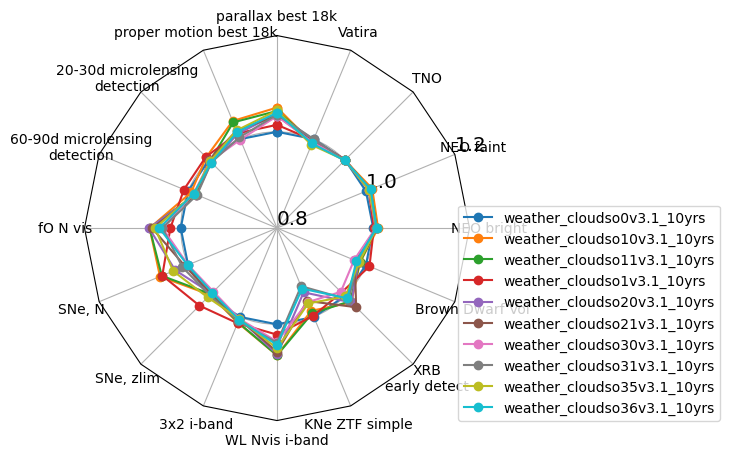

In [18]:
runs = [run for run in data.index ]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, mag_cols = mag_cols, norm_run='weather_cloudso0v3.1_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.8, 1.0, 1.2], bbox_to_anchor=(1.65, 0))

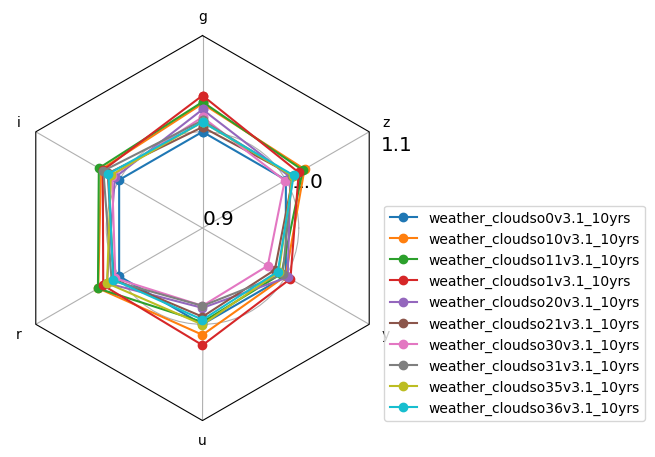

In [10]:
ndata = norm_df(mag_data, runs, cols=mag_data.columns.values.tolist(),
                mag_cols='all', norm_run='weather_cloudso0v3.1_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.9, 1.0, 1.1], bbox_to_anchor=(1.65, 0))

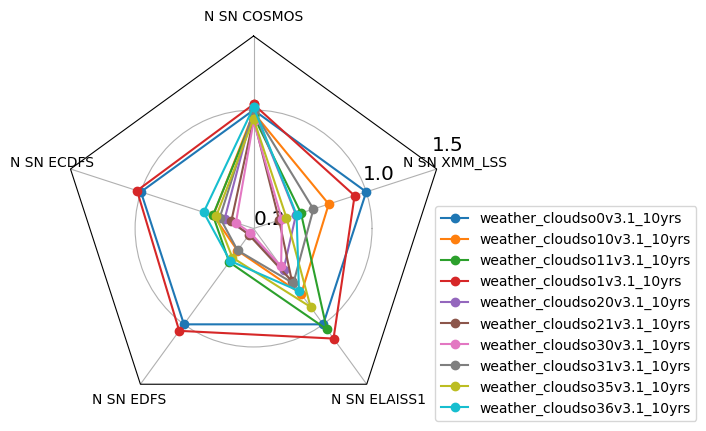

In [11]:
cols = [col for col in ddf_data.columns.values.tolist() if 'N SN' in col]

ndata = norm_df(ddf_data, runs, cols=cols,
                norm_run='weather_cloudso0v3.1_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.2, 1.0, 1.5], bbox_to_anchor=(1.65, 0))

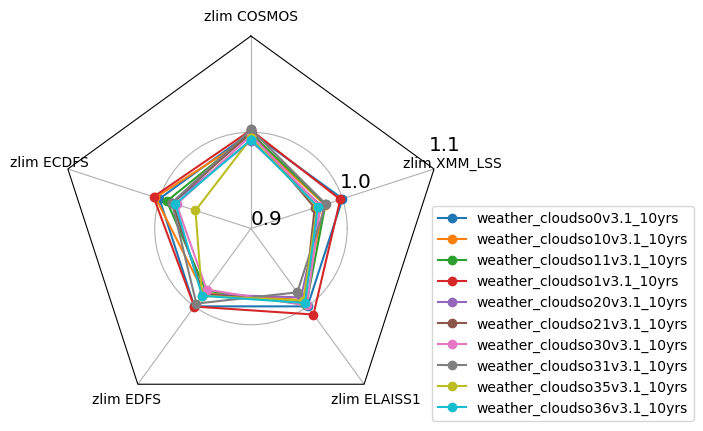

In [12]:
cols = [col for col in ddf_data.columns.values.tolist() if 'zlim' in col]

ndata = norm_df(ddf_data, runs, cols=cols,
                norm_run='weather_cloudso0v3.1_10yrs', mag_cols='all')
fig, ax = radar(ndata, legend=True, rgrids=[0.9, 1.0, 1.1], bbox_to_anchor=(1.65, 0))

In [13]:
ddf_data


,N SN COSMOS,N SN ECDFS,N SN EDFS,N SN ELAISS1,N SN XMM_LSS,zlim COSMOS,zlim ECDFS,zlim EDFS,zlim ELAISS1,zlim XMM_LSS
weather_cloudso0v3.1_10yrs,495.166276,267.594973,461.969641,176.214523,202.466247,0.590203,0.579154,0.527525,0.569684,0.566949
weather_cloudso10v3.1_10yrs,486.207661,130.013996,177.734721,131.557274,148.545178,0.586240,0.583482,0.510529,0.561680,0.547304
weather_cloudso11v3.1_10yrs,475.864836,130.805894,221.792182,183.522499,108.646605,0.588965,0.571131,0.507248,0.567559,0.548335
weather_cloudso1v3.1_10yrs,514.333328,274.940392,487.040797,197.136219,185.740662,0.592526,0.585605,0.527720,0.580159,0.564536
weather_cloudso20v3.1_10yrs,499.901193,108.607444,113.677516,95.964745,101.437820,0.581092,0.564993,0.512062,0.558159,0.543628
weather_cloudso21v3.1_10yrs,466.178799,95.864142,117.061927,112.931172,77.247808,0.589584,0.565085,0.511621,0.564331,0.536638
weather_cloudso30v3.1_10yrs,457.545766,87.155040,108.961190,91.015062,81.188281,0.586993,0.560413,0.505971,0.568482,0.542593
weather_cloudso31v3.1_10yrs,491.529232,117.719787,176.943495,115.764849,126.539896,0.593109,0.565532,0.523963,0.551624,0.548835
weather_cloudso35v3.1_10yrs,465.295772,124.614564,204.701003,150.697568,87.814696,0.583982,0.539760,0.513957,0.562366,0.539494
weather_cloudso36v3.1_10yrs,504.992899,148.406008,217.127161,127.162622,102.289943,0.582466,0.561729,0.513950,0.565333,0.540085
